#### Загружаем необходимые библиотеки для дальнейшей работы

In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Загружаем файл в переменную

In [444]:
df = pd.read_csv('stud_math.csv')

#### Посмотрим, что из себя представляют наши данные

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

#### Итак, мы имеем таблицу длиной 395 строк.
#### В нашей таблице 30 колонок, из которых 13 содержат числовые данные и 17 - нечисловые.
#### Колонки проименованы хорошо, поэтому трогать мы их не будем.
#### Мы так же видим, что данные неполные, и у нас есть нулевые и пустые строки.

#### 
#### Теперь посмотрим какое количество пустых значений в каждой колонке

In [446]:
df.isnull().sum().sort_values(ascending=False)

Pstatus                45
paid                   40
famsup                 39
Fjob                   36
internet               34
romantic               31
guardian               31
traveltime             28
famsize                27
famrel                 27
Fedu                   24
failures               22
higher                 20
Mjob                   19
reason                 17
address                17
nursery                16
health                 15
activities             14
absences               12
freetime               11
schoolsup               9
goout                   8
studytime               7
studytime, granular     7
score                   6
Medu                    3
age                     0
sex                     0
school                  0
dtype: int64

In [447]:
len(df)

395

#### Посмотрим, сколько у нас останется строк, если мы удалим все строки, где хотя бы в одной колонке будет NaN

In [448]:
df.dropna(how='any').shape[0]

97

#### 97 строк - это много или мало?

In [449]:
round(df.dropna(how='any').shape[0] / len(df), 2)

0.25

#### Проверим датасет на дубликаты

In [450]:
df.duplicated().sum()

0

#### Получаем 25% от датасета. То есть, если мы удалим все те строки, то наш датасет уменьшится на 75%. Многовато.
#### Интересно, будет ли нам достаточно этих данных для анализа?
#### Проверим числовые колонки на выбросы, уберем выбросы, посмотрим на корреляцию между score и остальными числовыми колонками
#### После того, как мы определим колонки с низкой корреляцией с данными score, мы сможем удалить только те строки из датасета, в которых значения по колонкам с низкой корреляцией будут NaN

#### 
#### Создадим список названий колонок с числовыми данными

In [451]:
d_types = df.dtypes.to_dict()  # Создаем словаь из пары название колонки - тип данных


numeric_columns = []
for key, value in d_types.items():  # Создадим список колонок с числовыми данными
    if value == 'O':
        continue
    else:
        numeric_columns.append(key)

#### Построим график типа boxplot для каждой числовой колонки, посмотрим на выбросы

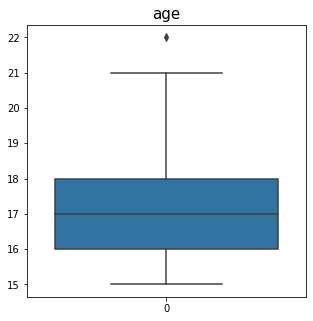

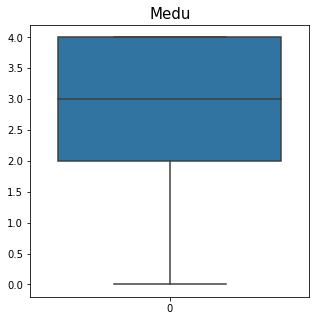

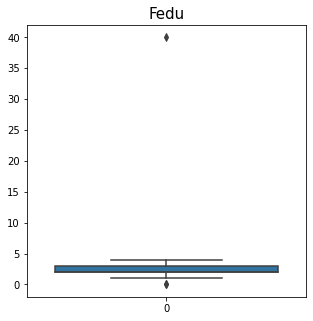

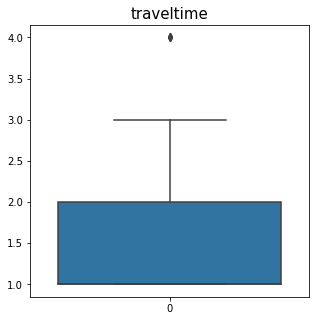

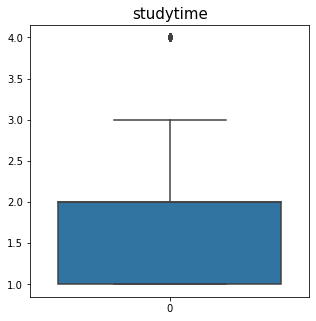

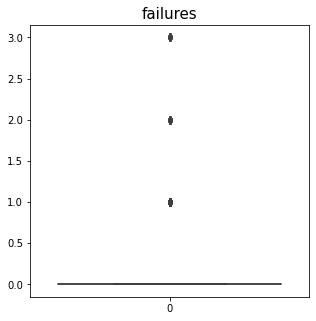

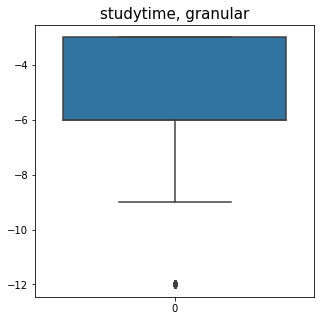

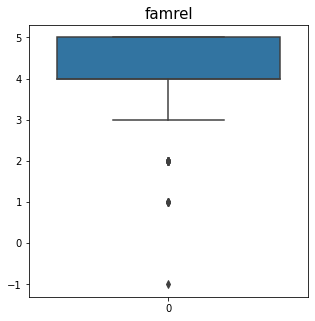

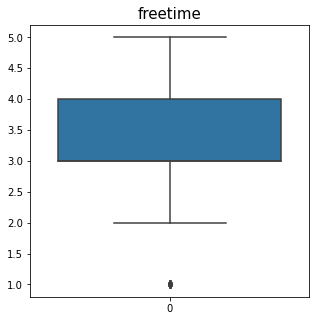

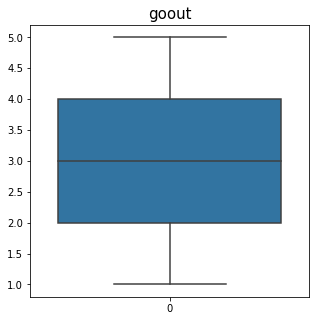

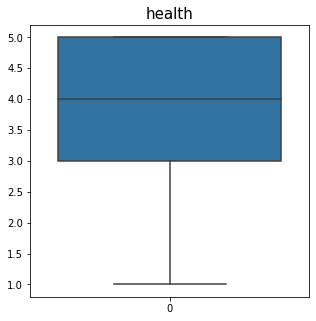

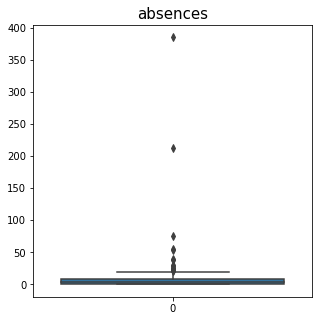

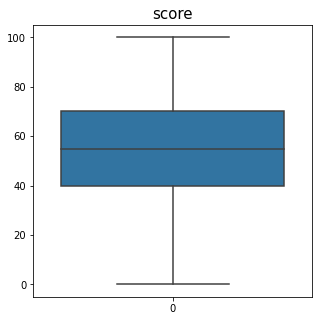

In [452]:
for column in numeric_columns:
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.boxplot(data=df[column])
    plt.title(column, fontsize=15)
    plt.show()

#### Избавимся от строк с выбросами
#### Напишем функцию определения выбросов и удалим строки с этими выбросами
#### После чего будет понятно сколько строк от исходного датасета у нас остается

In [453]:
# Напишем функцию определения границ выбросов, где в аргумент передаем имя колонки
def del_rows_with_outliers(column_name):
    perc25 = df[column_name].quantile(0.25)
    perc75 = df[column_name].quantile(0.75)
    IQR = df[column_name].quantile(0.75) - df[column_name].quantile(0.25)
    higher_bound = perc75 + 1.5*IQR
    lower_bound = perc25 - 1.5*IQR
    return lower_bound, higher_bound

In [454]:
# Протестируем функцию c использованием нашего списка числовых колонок numeric_columns
for i in numeric_columns:
    print(i, del_rows_with_outliers(i))

age (13.0, 21.0)
Medu (-1.0, 7.0)
Fedu (0.5, 4.5)
traveltime (-0.5, 3.5)
studytime (-0.5, 3.5)
failures (0.0, 0.0)
studytime, granular (-10.5, 1.5)
famrel (2.5, 6.5)
freetime (1.5, 5.5)
goout (-1.0, 7.0)
health (0.0, 8.0)
absences (-12.0, 20.0)
score (-5.0, 115.0)


#### Отлично! Все работает. Теперь напишем цикл фильтрации данных и попробуем уберать все выбросы из числовых колонок.
#### Сейчас наш датафрейм состоит из 395 строк. Проверим сколько строк останется после цикла.

In [455]:
# for i in numeric_columns:
#     df = df[(df[i]>del_rows_with_outliers(i)[0]) & (df[i]<del_rows_with_outliers(i)[1])]

#### 0, Карл! )) Получается, что если мы последовательно (следуя списку числовых колонок) удаляем строки с выбросами из нашего датарейма, мы удаляем весь наш датафрейм. Так не сработает. Попробуем удалить только строки с самыми явными выбросами.

In [456]:
for column in df.columns:
    print(column, df[column].unique())

school ['GP' 'MS']
sex ['F' 'M']
age [18 17 15 16 19 22 20 21]
address ['U' nan 'R']
famsize [nan 'GT3' 'LE3']
Pstatus ['A' nan 'T']
Medu [ 4.  1.  3.  2. nan  0.]
Fedu [ 4.  1.  2.  3. 40. nan  0.]
Mjob ['at_home' 'health' 'other' 'services' 'teacher' nan]
Fjob ['teacher' 'other' nan 'health' 'services' 'at_home']
reason ['course' 'other' 'home' 'reputation' nan]
guardian ['mother' 'father' 'other' nan]
traveltime [ 2.  1.  3. nan  4.]
studytime [ 2.  3.  1. nan  4.]
failures [ 0.  3. nan  2.  1.]
schoolsup ['yes' 'no' nan]
famsup ['no' 'yes' nan]
paid ['no' nan 'yes']
activities ['no' 'yes' nan]
nursery ['yes' 'no' nan]
studytime, granular [ -6.  -9.  -3.  nan -12.]
higher ['yes' nan 'no']
internet [nan 'yes' 'no']
romantic ['no' nan 'yes']
famrel [ 4.  5.  3. nan -1.  2.  1.]
freetime [ 3.  2.  4.  1.  5. nan]
goout [ 4.  3.  2.  1.  5. nan]
health [ 3.  5.  1.  2.  4. nan]
absences [  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.

In [457]:
df.loc[11, ['Fedu']] = 4  # Заменим 40 на 4, т.к. это явно выглядит, как ошибка

In [458]:
df.drop(['studytime, granular'], axis=1, inplace=True)
# Удалим столбец 'studytime, granular', т.к. нам неизвестно что это за показатель

In [459]:
# Заменим -1 на 1, т.к. это явно выглядит, как ошибка
df.loc[25, ['famrel']] = 1

<AxesSubplot:ylabel='Frequency'>

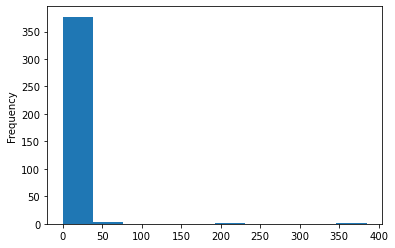

In [475]:
df.absences.plot(kind='hist')
# Посмотрим на гистограмму распределения по количеству пропусков занятий

In [476]:
df.drop(df[df.absences > 50].index, inplace=True)
df.drop(df[df.absences.isnull()].index, inplace=True)
# Удалим выбросы (значения > 50) и пустые строки

In [477]:
len(df)

378

#### Построим график heatmap из библиотеки Seaborn и посмотрим на корреляцию данных числовых колонок

In [479]:
correlation = df.corr()

<AxesSubplot:>

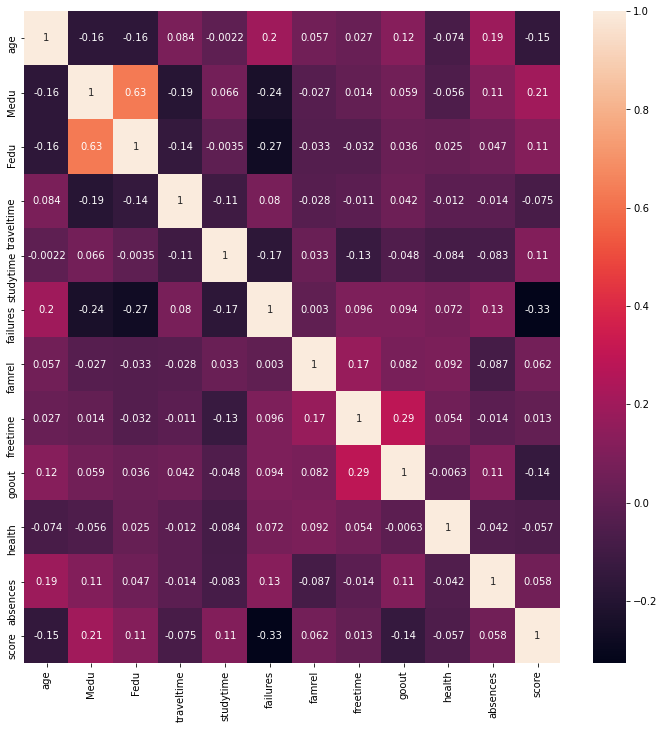

In [485]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,
            annot=True)

#### Итак, мы можем проследить следующие взаимосвязи:
1. Образование обоих родителей имеет самую высокую положительную корреляцию (0.63). Логично, что мы выбираем в спутники себе подобных.
2. Наличие свободного времени и проведение этого времени с друзьями так же имеет положительную корреляцию (0.29). Она не высокая, но взаимосвязь тем не менее существует.
3. Количество внеучебных неудач имеет обратную корреляцию с образованием родителей (-0.24 по матери и -0.27 по отцу), то есть чем хуже образование родителей, тем больше неудач у студента.
4. Время в пути до школы так же имеет обратную корреляцию с образованием родителей (-0.19 по матери и -0.14 по отцу), то есть чем хуже образование родителей, тем дальше от школы живет студент. Эта корреляция относительно слабая. Мы не можем с уверенностью утверждать, что это всегда так, но тем не менее взаимосвязь имеется.
5. Наличие внеучебных неудач имеет прямую корреляцию с количеством пропущенных занятий (0.13). Достаточно логично - учиться сложно, когда голова занята проблемами личного характера.
6. Интересная прямая корреляция наблюдается между образованием матери и баллами по госэкзамену по математике (0.21). Корреляция относительно невысокая, но мы можем сказать, что в ряде случаев чем выше образование матери, тем выше балл студента по госэкзамену. Возможно это связано с мотивацией студента не быть хуже чем его самый близкий человек, проявлять себя и радовать своими оценками родителей.
7. Прямая корреляция между возрастом и количеством пропущенных занятий (0.19). Логично, чем старше мы становимся, тем больше внеучебных интересов у нас появляется, тем чаще мы прогуливаем школу.
8. Наличие внеучебных неудач имеет достаточно обратную корреляцию с баллами по госэкзамену по математике (-0.33). Вывод: чем проблемней студент, тем хуже его результаты. Более чем логично.

#### Теперь посмотрим на распределение данных между баллами по госэкзамену и иными нечисловыми показателями по группам, используя график histplot из библиотеки Seaborn

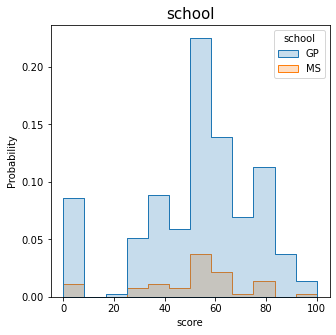

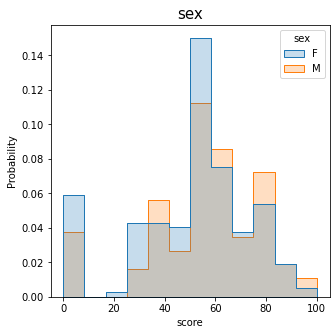

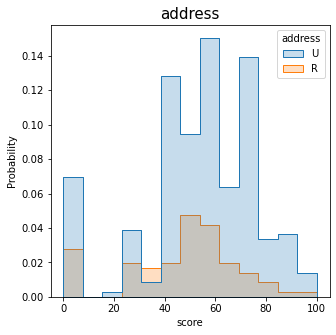

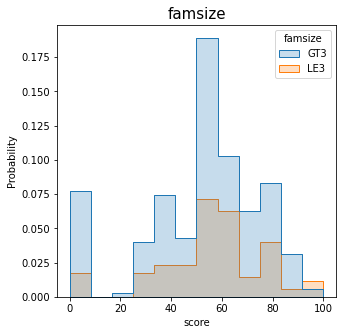

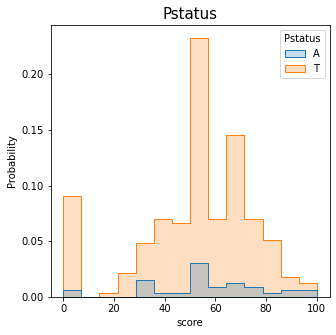

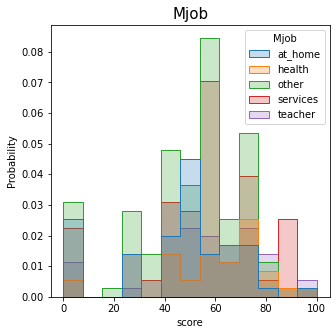

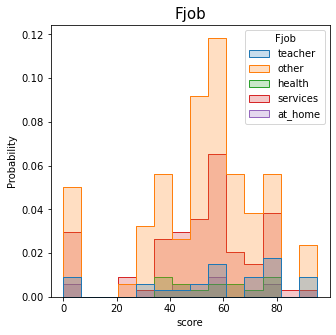

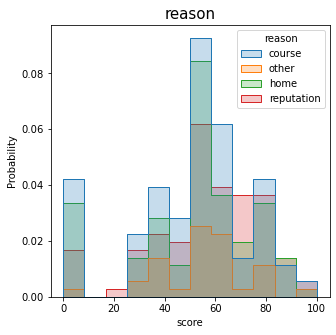

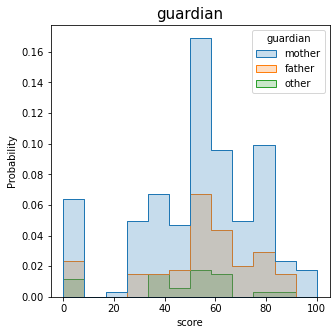

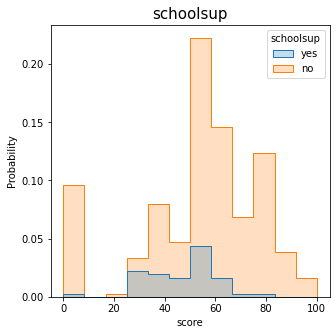

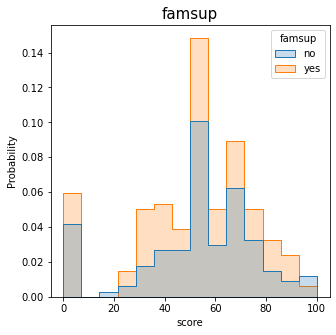

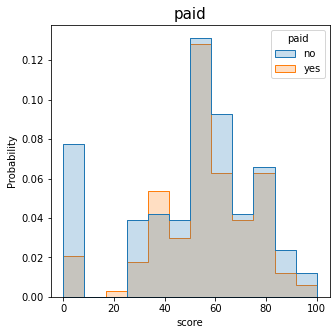

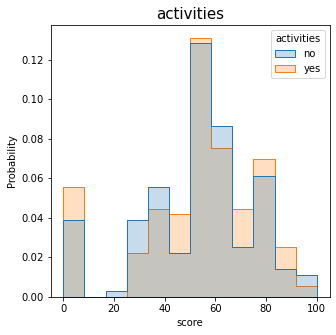

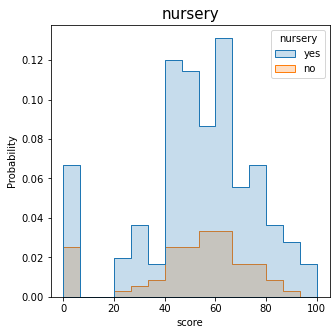

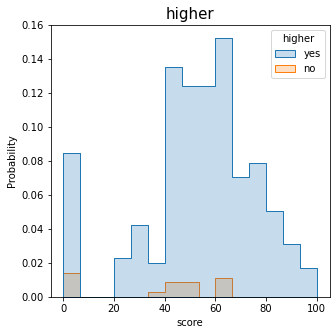

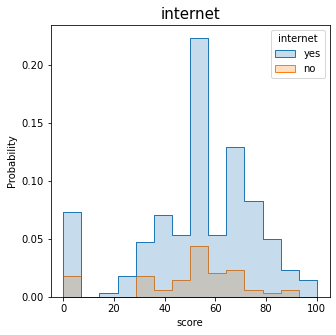

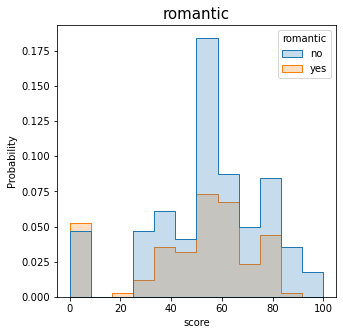

In [506]:
object_columns = []
for key, value in df.dtypes.items():
    # Создадим список колонк с нечисловыми данными
    if value != 'object':
        continue
    else:
        object_columns.append(key)

for column in object_columns:
    # Запустим цикл, который выведет нам все графики по всем колонкам из списка
    # И посмотрим на распределение вероятности показателей внутри каждой колонки и баллами за госэкзамен
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.histplot(x='score', hue=column, data=df,
                 element='step', stat='probability')
    plt.title(column, fontsize=15)
    plt.show()

#### Мы видим что у нас есть студенты с нулевым баллом за госэкзамен. Если мы обратим внимание на остальные показатели по этим студентам, то мы можем сделать вывод, что это такие же студенты с разными показателями успеваемости и благополучия, как и те, у кого балл за госэкзамен больше 20. Таким образом мы пониманием, что это просто пустые данные, и их нельзя использовать для анализа.
#### Удалим из нашей выборки студентов с нулевыми баллами за госэкзамен. 

In [509]:
df[df.score == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,...,yes,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,...,yes,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,...,no,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,...,yes,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,...,yes,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,...,yes,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,...,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,...,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,...,yes,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,...,yes,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


In [510]:
df.drop(df[df.score == 0].index, inplace=True)
# Удалим строки со студентами, у которых 0 баллов за госэкзамен

#### Посмотрим еще раз на корреляцию

<AxesSubplot:>

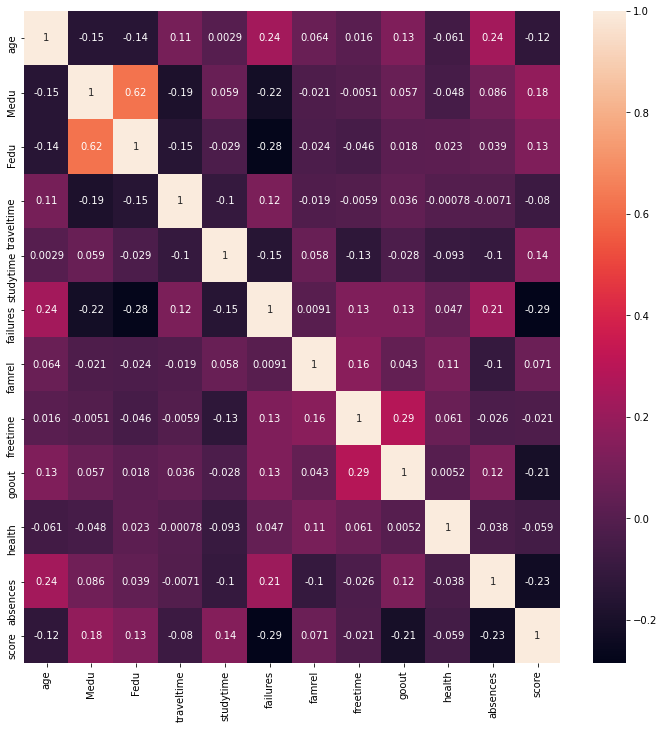

In [514]:
correlation = df.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,
            annot=True)

#### Теперь посмотрим как распределяется средний балл за госэкзамен по неичсловым показателям

In [520]:
for column in object_columns:
    display(df.groupby([column])['score'].mean())

school
GP    57.919463
MS    54.871795
Name: score, dtype: float64

sex
F    56.028571
M    59.228395
Name: score, dtype: float64

address
R    52.681159
U    58.745098
Name: score, dtype: float64

famsize
GT3    57.432432
LE3    58.563830
Name: score, dtype: float64

Pstatus
A    59.218750
T    57.191011
Name: score, dtype: float64

Mjob
at_home     53.936170
health      64.666667
other       54.681818
services    59.411765
teacher     59.081633
Name: score, dtype: float64

Fjob
at_home     59.285714
health      56.785714
other       56.520468
services    56.547619
teacher     64.130435
Name: score, dtype: float64

reason
course        56.415929
home          58.275862
other         55.806452
reputation    58.956044
Name: score, dtype: float64

guardian
father    58.552632
mother    57.769953
other     54.750000
Name: score, dtype: float64

schoolsup
no     59.487633
yes    47.222222
Name: score, dtype: float64

famsup
no     58.173913
yes    56.968085
Name: score, dtype: float64

paid
no     58.220859
yes    57.482014
Name: score, dtype: float64

activities
no     56.656250
yes    58.606061
Name: score, dtype: float64

nursery
no     56.406250
yes    57.624521
Name: score, dtype: float64

higher
no     50.454545
yes    57.792208
Name: score, dtype: float64

internet
no     55.312500
yes    57.950192
Name: score, dtype: float64

romantic
no     58.197115
yes    56.550000
Name: score, dtype: float64

#### Сделаем допущение, что если среднее значение бала за госэкзамен в колонках отличается на 2, то различия несущественны. Таким образом мы можем избавиться от колонок famsize, paid, nursery, Pstatus, famsup, activities, nursery, romantic.

In [583]:
df_cleared = df.loc[:, ~df.columns.isin(['famsize', 'paid', 'nursery',
                                         'Pstatus', 'famsup', 'activities', 'nursery', 'romantic'])]

#### Теперь мы знаем корреляцию между числовыми показателями и средний бал за госэкзамен у разных нечисловых параметров

#### Создадим новый датафрейм и избавимся от числовых колонок с низкой корреляцией и нечисловых колонк, в которых мы не наблюдаем сильных отклонений между средним показателем бала за госэкзамен

In [572]:
# df.loc[:, df.columns.isin(numeric_columns)][df.score>=90].mean()

In [571]:
# df.loc[:, df.columns.isin(numeric_columns)]

In [569]:
# df.groupby(['traveltime'])['score'].mean()

In [570]:
# df.famrel.unique()

#### Для удобства выведем матрицу корреляций с условием, что нас интересуют только значения >0.1 и <-0.1

In [564]:
correlation[(correlation < 0.1) & (correlation > -0.1)]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,NaN,NaN,NaN,NaN,0.002938,NaN,0.064147,0.015904,NaN,-0.061325,NaN,NaN
Medu,NaN,NaN,NaN,NaN,0.059461,NaN,-0.020988,-0.005072,0.056825,-0.048402,0.086035,NaN
Fedu,NaN,NaN,NaN,NaN,-0.028695,NaN,-0.024335,-0.046112,0.017714,0.023252,0.039447,NaN
traveltime,NaN,NaN,NaN,NaN,NaN,NaN,-0.019169,-0.005894,0.036232,-0.000785,-0.007122,-0.079812
studytime,0.002938,0.059461,-0.028695,NaN,NaN,NaN,0.057749,NaN,-0.028182,-0.092552,-0.099881,NaN
failures,NaN,NaN,NaN,NaN,NaN,NaN,0.009105,NaN,NaN,0.047499,NaN,NaN
famrel,0.064147,-0.020988,-0.024335,-0.019169,0.057749,0.009105,NaN,NaN,0.042791,NaN,NaN,0.071065
freetime,0.015904,-0.005072,-0.046112,-0.005894,NaN,NaN,NaN,NaN,NaN,0.061184,-0.026150,-0.021410
goout,NaN,0.056825,0.017714,0.036232,-0.028182,NaN,0.042791,NaN,NaN,0.005183,NaN,NaN
health,-0.061325,-0.048402,0.023252,-0.000785,-0.092552,0.047499,NaN,0.061184,0.005183,NaN,-0.038007,-0.059245


#### Отсюда видно, что к не влияющим на итоговый бал по госэкзамену числовым показателям относятся traveltime, famrel, freetime и health

In [584]:
df_cleared = df_cleared.loc[:, ~df_cleared.columns.isin(
    ['traveltime', 'famrel', 'freetime', 'health'])]

In [585]:
df_cleared

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,studytime,failures,schoolsup,higher,internet,goout,absences,score
0,GP,F,18,U,4.0,4.0,at_home,teacher,course,mother,2.0,0.0,yes,yes,NaN,4.0,6.0,30.0
1,GP,F,17,U,1.0,1.0,at_home,other,course,father,2.0,0.0,no,yes,yes,3.0,4.0,30.0
2,GP,F,15,U,1.0,1.0,at_home,other,other,mother,2.0,3.0,yes,yes,yes,2.0,10.0,50.0
3,GP,F,15,U,4.0,2.0,health,NaN,home,mother,3.0,0.0,no,yes,yes,2.0,2.0,75.0
4,GP,F,16,U,3.0,3.0,other,other,home,father,2.0,0.0,no,yes,no,2.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,3.0,1.0,teacher,services,course,mother,2.0,0.0,no,yes,yes,4.0,0.0,40.0
391,MS,M,17,U,3.0,1.0,services,services,course,mother,1.0,0.0,no,yes,yes,5.0,3.0,80.0
392,MS,M,21,R,1.0,1.0,other,other,course,NaN,1.0,3.0,NaN,NaN,no,3.0,3.0,35.0
393,MS,M,18,R,3.0,2.0,services,other,course,mother,1.0,0.0,no,yes,yes,1.0,0.0,50.0


In [587]:
df_cleared

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,studytime,failures,schoolsup,higher,internet,goout,absences,score
0,GP,F,18,U,4.0,4.0,at_home,teacher,course,mother,2.0,0.0,yes,yes,NaN,4.0,6.0,30.0
1,GP,F,17,U,1.0,1.0,at_home,other,course,father,2.0,0.0,no,yes,yes,3.0,4.0,30.0
2,GP,F,15,U,1.0,1.0,at_home,other,other,mother,2.0,3.0,yes,yes,yes,2.0,10.0,50.0
3,GP,F,15,U,4.0,2.0,health,NaN,home,mother,3.0,0.0,no,yes,yes,2.0,2.0,75.0
4,GP,F,16,U,3.0,3.0,other,other,home,father,2.0,0.0,no,yes,no,2.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,3.0,1.0,teacher,services,course,mother,2.0,0.0,no,yes,yes,4.0,0.0,40.0
391,MS,M,17,U,3.0,1.0,services,services,course,mother,1.0,0.0,no,yes,yes,5.0,3.0,80.0
392,MS,M,21,R,1.0,1.0,other,other,course,NaN,1.0,3.0,NaN,NaN,no,3.0,3.0,35.0
393,MS,M,18,R,3.0,2.0,services,other,course,mother,1.0,0.0,no,yes,yes,1.0,0.0,50.0


#### Таким образом мы получили датафрейм, очищенный от явных выбросов, числовых колонок с низкой корреляцией с итоговым баллом по госэкзамену и колонок, в которых среднее значение между группами не превышает 2 балла. Полученный датафрейм можно будет использовать в качестве модели для машинного обучения.
#### В основе построения будущей модели для машинного обучения будет находится принцип уменьшения выборки, а именно: получая на вход определенные показатели, модель будет обращаться к имеющимся в датафрейме данным, уменьшая выборку в пределах, удовлетворяющих критериям данных показателей. Итогом будет являться конечная выборка, с указанием среднего в качестве прогноза и возможного предела с нижней и верхней границами. 